In [23]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load custom evaluation plot functions
from classification_evaluation import plot_roc_curve, plot_pr_curve, plot_calibration_curve, plot_decision_curve
from classification_evaluation import plot_roc_thresholds, plot_pr_thresholds

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

In [24]:
# Download UCI diabetes datset
url = "https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/diabetes.csv"
diabetes = pd.read_csv(url)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'],
                                                    diabetes['Outcome'], stratify=diabetes['Outcome'],
                                                    random_state=0)

# Fit model

In [39]:
# fit
clf = LogisticRegression().fit(X_train, y_train)

# predict probabilities and assign y_pred with the probability of class "1"
y_pred = clf.predict_proba(X_test)[:,1].reshape(-1,1)
y_true = y_test

C:\Users\HR\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Single plots

## ROC

 Simple plot

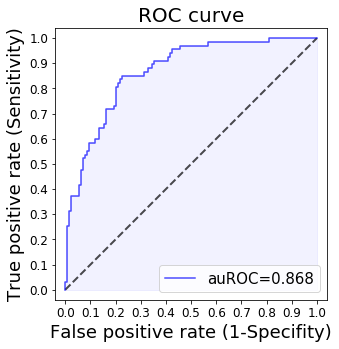

In [41]:
plot_roc_curve(y_true, y_pred, fill=True)

## Precision Recall curve

 Simple plot

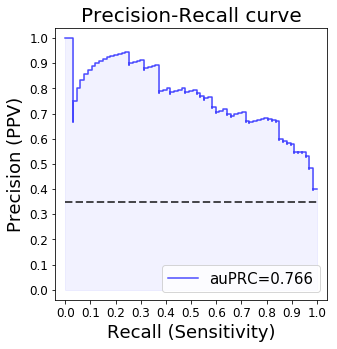

In [44]:
plot_pr_curve(y_true, y_pred, fill=True)

## Calibration curves

Plot with bins given by absolute bins of probabilites, i.e.: [0,10], [10,20], .... [90,100]

Plot with histogram as seperate subplot

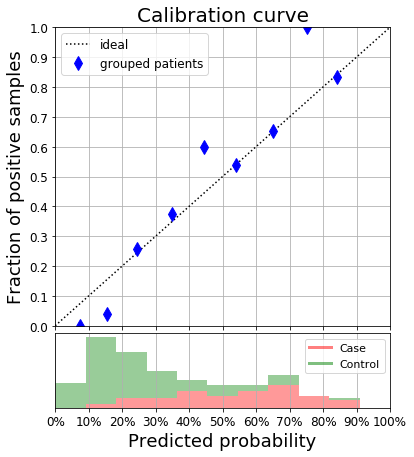

In [46]:
plot_calibration_curve(y_true, y_pred, n_bins=10, bins_by_percentile=False, plot_lowess=False, as_subplot=True);

Plot with bins given by deciles of predicted probablilites

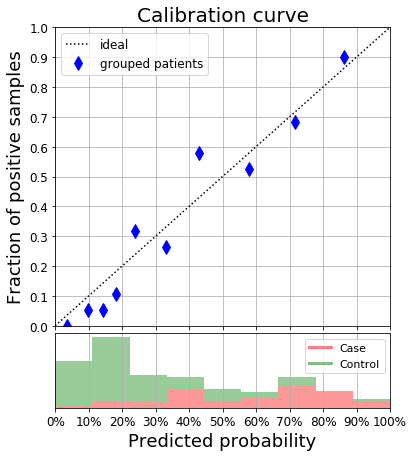

In [55]:
plot_calibration_curve(y_true, y_pred, n_bins=10, bins_by_percentile=True,
                       normalize=True, plot_lowess=False, as_subplot=True);

Plot with histogram on same plot

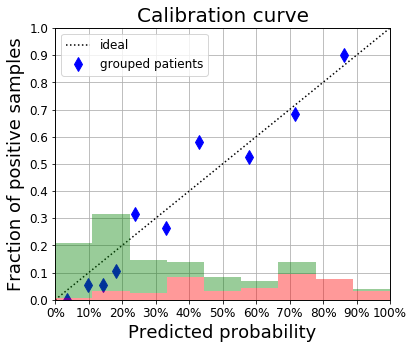

In [56]:
plot_calibration_curve(y_true, y_pred, n_bins=10, bins_by_percentile=True,
                       normalize=True, plot_lowess=False, as_subplot=False);

## Decision curves

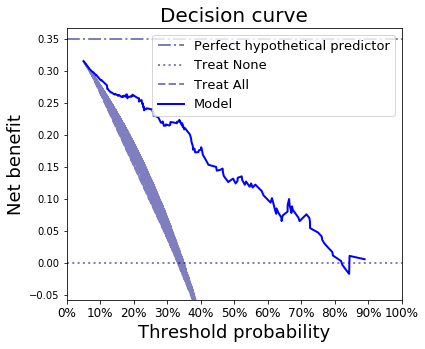

In [66]:
plot_decision_curve(y_true, y_pred.reshape(-1,1), label='Model')